# Self-learning 7.1 : Understanding inverse discrete Fourier transform

To enhance my understanding of inverse discrete Fourier transform, this notebook derives it in a different way from the textbook.  

## Derivation in the textbook

In the textbook, the inverse discrete Fourier transform is derived in the following way.  
Expand a function $f(x)$ defined on $[0,L]$ (and extended periodically with period $L$) into a Fourier series, 
$$
f(x) = \sum_{k=-\infty}^\infty \gamma_k \exp\left(i\frac{2\pi k}{L}x \right).  \tag{1}
$$
The Fourier transform is
$$
\gamma_k = \frac{1}{L}\int_0^L dx~ f(x)\exp\left(-i\frac{2\pi k}{L}x \right). \tag{2}
$$
Then approximate the integral in Eq.(2) by the trapezoidal method, by sampling $N$ points from $f(x)$, with notation $x_n=\frac{L}{N}n$ and  $y_n=f(x_n)$ for $n=0,1,\dots, N$, 
$$
\gamma_k^{\rm (approx)} = \frac{1}{N}\sum_{n=0}^{N-1} y_n \exp\left(-i\frac{2\pi kn}{N} \right).   \tag{3}
$$
(In the textbook, a symbol $c_k=N\gamma_k^{\rm (approx)}$ is used instead of $\gamma_k^{\rm (approx)}$. )

What is emphasized in the textbook as an amazing fact is that we can recover the ${\it exact}$ values $y_n$ from $\gamma_k^{\rm (approx)}$ as 
$$
y_n = \sum_{k=0}^{N-1}\gamma_k^{\rm (approx)} \exp\left(i\frac{2\pi kn}{N} \right),  \tag{4}
$$
although $\gamma_k^{\rm (appox)}$ is only an ${\it approximation}$ of the true integral in Eq.(2).  The representation Eq.(4) is called the inverse discrete Fourier transform.  

## Derivation in this notebook  

In the derivation in the textbook above, it may be unclear why $\gamma_k^{\rm (approx)}$ in Eq.(3) by the trapezoidal approximation gives Eq.(4): Why does the trapezoidal method give the exact values $y_n$ although it is a mere approximation method, and why is it special here among many other approximation methods?  
Here, we will start from Eq.(1), and sample its value by $y_n=f(x_n)$, and directly derive Eq.(4).  In the way, the trapezoidal method appears naturally.  

First, we substitute $x=x_n$ in Eq.(1), 
$$
y_n = \sum_{k=-\infty}^\infty \gamma_k \exp\left(i\frac{2\pi kn}{N} \right).  \tag{5}
$$
Since
$$
\exp\left(i\frac{2\pi (k+N)n}{N} \right) = \exp\left(i 2\pi n \right)\exp\left(i\frac{2\pi kn}{N} \right) = \exp\left(i\frac{2\pi kn}{N} \right)
$$
the waves at frequencies $k+mN$ with $m=0,\pm1,\pm2,\cdots$ look as the same wave for the sample points $x_n$'s.  
Therefore, we have only to pay attention to, for example, $k=0,1,\dots N-1$, and Eq.(5) becomes
$$
y_n = \sum_{k=0}^{N-1} \Gamma_k \exp\left(i\frac{2\pi kn}{N} \right) \quad {\rm with}\quad \Gamma_k = \sum_{m=-\infty}^{\infty}\gamma_{k+mN} \tag{6}
$$
The remaining task to derive Eq.(4) is to show $\Gamma_k=\gamma_k^{\rm (approx)}$.  Using Eq.(2),  
$$
\begin{align}
\Gamma_k &= \sum_{m=-\infty}^{\infty}\frac{1}{L}\int_0^L dx~ f(x)\exp\left(-i\frac{2\pi (k+mN)}{L}x \right) \\
&= \frac{1}{L}\int_0^L dx~ f(x)\exp\left(-i\frac{2\pi k}{L}x \right)\sum_{m=-\infty}^{\infty}\exp\left(-i\frac{2\pi mN}{L}x \right) \tag{7}
\end{align}
$$

Now we use the Poisson summation formula
$$
\sum_{m=-\infty}^{\infty}\exp\left(-i\frac{2\pi m}{T}x \right) =T\sum_{n=-\infty}^{\infty}\delta(x-nT),
$$
where $\delta(x)$ is the Dirac delta function.  Setting $T=\frac{L}{N}$, we get
$$
\sum_{m=-\infty}^{\infty}\exp\left(-i\frac{2\pi mN}{L}x \right) =\frac{L}{N}\sum_{n=-\infty}^{\infty}\delta(x-x_n),  \tag{8}
$$
We use a slightly abuse notation here: the sampling points $x_n=\frac{L}{N}n$ are defined only for $n=0,1,\cdots, N$ but we extend the notation for all integers $n$ (as we will see soon, only $n=0,1,\cdots, N$ will contribute to the final result, though).   The right-hand side of Eq.(8) is called the Dirac comb (apart from the coefficient $\frac{L}{N}$).  
Let us appreciate the Poisson summation formula. In the left-hand side of Eq.(8), we sum all the waves which take value $1.0$ at the sampling points $x_n$'s.  Just at the sampling points $x_n$, these waves add up together. On the other hand, at $x$ different from the sampling points, the waves cancel out.  The result is the Dirac comb over the sampling points.    In words, the Poisson formula says that when we add up waves which are indistinguishable to a set of equally spaced sampling points, the summation becomes the Dirac comb over the sampling points. See the animation in Appendix. 

Let us continue the calculation of Eq.(7) by substituting Eq.(8) into it.  Since the integral in Eq.(7) is from 0 to $L$, only $n=0,1,\cdots, N$ at the right-hand side of Eq.(8) contribute.  Moreover, at the edge points $x=0$ and $x=L$, the contribution get halved.  Therefore, 
$$
\Gamma_k = \frac{1}{N}\left\{\frac{1}{2}f(0)+\frac{1}{2}f(L) + 
\sum_{n=1}^{N-1}f(x_n)\exp\left(-i\frac{2\pi k}{L}x_n \right)\right\}
$$
This is nothing but the trapezoidal method applied to "approximate" $\gamma_k$ in Eq.(2).  Thus, we have shown $\Gamma_k=\gamma_k^{\rm (approx)}$ and derived the inverse discrete Fourier transform Eq.(4).  (Recall $f(0)=f(L)$ by assumption.)

### comment
We have shown $\Gamma_k=\gamma_k^{\rm (approx)}$, that is,
$$
\begin{align}
&\sum_{m=-\infty}^{\infty}\gamma_{k+mN}\quad \text{(i.e., summation of $\gamma_k$ over all the waves which are indistinguishable to $N$ equally spaced sampling points)} \\
 =& \gamma_k^{\rm (approx)} \quad\text{(i.e., $\gamma_k$ caculated by trapezoidal rule with the $N$ sampling points}) 
\end{align}
$$
The appearance of the trapezoidal method was directly related to the Dirac comb.  

The flow was:  
We are interested only in $y_n$, the values of $f(x)$ at equally spaced sampling points  
$\rightarrow$ Waves which are indistinguishable to the sampling points get summed  
$\rightarrow$ Dirac comb appears (because the waves add up at the sampling points and cancel out at the other points)  
$\rightarrow$ The trapezoidal rule

## Appendix : Visualization of Poisson summation formula

Just for fun, let us visualize Poisson summation formula, 
$$
\sum_{m=-\infty}^{\infty}\exp\left(-i2\pi mx \right) =\sum_{n=-\infty}^{\infty}\delta(x-n)
$$
The left-hand side is 
$$
\sum_{m=-\infty}^{\infty}\exp\left(-i2\pi mx \right) = 1 + 2\cos(2\pi  x) + 2\cos(4\pi  x) + \cdots.
$$
In the following, we make animation to demonstrate this summation. 

In [1]:
import os
from math import pi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import base64


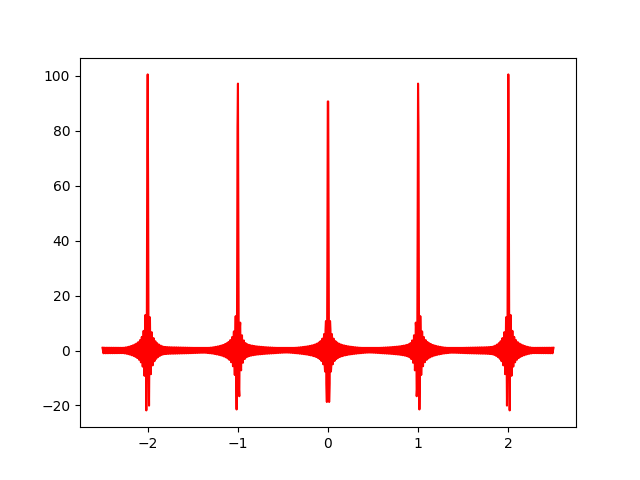

In [2]:
def fourier_sum(x, M):
    result = np.ones_like(x)
    if M==0: 
        return result
    for m in range(1, M + 1):
        result += 2 * np.cos(2*pi*m*x)
    return result

x = np.linspace(-2.5, 2.5, 1000)

def update(frame):
    if frame != 0:
        plt.cla()
    y = fourier_sum(x, frame)
    plt.plot(x, y, 'r')

fig = plt.figure()
ani = FuncAnimation(fig, update, frames=range(51), interval=200)

display(HTML(ani.to_jshtml()))


# for animation on Github
out_dir = os.path.join("results", "self_7_1")
os.makedirs(out_dir, exist_ok=True)
outpath = os.path.join(out_dir, "Poisson_summation.gif")
ani.save(outpath, writer="pillow") 
plt.close(fig)

with open(outpath, "rb") as f:
    gif_data = f.read()
    b64_gif = base64.b64encode(gif_data).decode("utf-8")

display(HTML(f'<img src="data:image/gif;base64,{b64_gif}" />'))